In [1]:
import csv
import numpy as np
import pandas as pd
data = pd.read_csv("agilitix_ocr_data.csv")
data.head()

,Month,Hyderabad,Delhi,Mumbai
0,Jan-10,200.0,489.0,833.58
1,Feb-10,210.0,418.0,789.30
2,Mar-10,190.5,418.0,788.09
3,Apr-10,200.0,483.0,783.99
4,May-10,205.3,490.1,823.89


In [8]:
# Average price in each of the cities by year?
def Task_1():
  ten = []
  eleven = []
  twelve = []
  j = 0
  for i in data["Month"]:
    p = i.split('-')[1]
    if(int(p) == 10):
      ten.append(j)
    elif(int(p) == 11):
      eleven.append(j)
    else:
      twelve.append(j)
    j+=1

  # dropping rows to create alternate dataframes
  df_2010 = data.drop(eleven)
  df_2010 = df_2010.drop(twelve)
  df_2011 = data.drop(ten)
  df_2011 = df_2011.drop(twelve)
  df_2012 = data.drop(eleven)
  df_2012 = df_2012.drop(ten)
  # print(df_2010["Delhi"].mean())
  for i in ['Hyderabad','Delhi', 'Mumbai']:
    print(str(i)+"-2010 " + str(df_2010[i].mean()))
    print(str(i)+"-2011 " + str(df_2011[i].mean()))
    print(str(i)+"-2012 " + str(df_2012[i].mean()))

Task_1()

# Output
# Hyderabad-2010 309.955
# Hyderabad-2011 551.2666666666667
# Hyderabad-2012 643.5433333333333
# Delhi-2010 492.38333333333327
# Delhi-2011 525.725
# Delhi-2012 726.7122222222222
# Mumbai-2010 842.9483333333333
# Mumbai-2011 1088.6425000000002
# Mumbai-2012 1423.5322222222221

Hyderabad-2010 309.955
Hyderabad-2011 551.2666666666667
Hyderabad-2012 643.5433333333333
Delhi-2010 492.38333333333327
Delhi-2011 525.725
Delhi-2012 726.7122222222222
Mumbai-2010 842.9483333333333
Mumbai-2011 1088.6425000000002
Mumbai-2012 1423.5322222222221


In [95]:
# Finding outliers using the Standard deviations
def Task_2_SD():
  from scipy import stats
  # Finding the outliers of each column (city-wise)
  for i in data.columns[1:-1]:
    df = data[i]
    af = df[(np.abs(stats.zscore(df)) < 3)]
    print("Outliers for " + i +" " + str(len(df) - len(af)))
  print("\nReducing the Z-Score to 2\n")
  for i in data.columns[1:-1]:
    df = data[i]
    af = df[(np.abs(stats.zscore(df)) < 2)]
    ff = pd.merge(df, af, how='outer', indicator=True)
    print("The "+str(len(df) - len(af))+ " Outliers of "+ i+ " are:")
    print(ff.loc[ff._merge == 'left_only', [i]].values)
Task_2_SD()


'''
Outliers for Hyderabad 0
Outliers for Delhi 0
Outliers for Mumbai 0

Reducing the Z-Score to 2

The 1 Outliers of Hyderabad are:
[[979.]]
The 1 Outliers of Delhi are:
[[234.88]]
The 2 Outliers of Mumbai are:
[[ 462.82]
 [1909.72]]
 '''


Outliers for Hyderabad 0
Outliers for Delhi 0
Outliers for Mumbai 0

Reducing the Z-Score to 2

The 1 Outliers of Hyderabad are:
[[979.]]
The 1 Outliers of Delhi are:
[[234.88]]
The 2 Outliers of Mumbai are:
[[ 462.82]
 [1909.72]]


In [121]:
# Finding outliers using the Quantiles
def Task_2_Quantile():
  for i in data.columns[1:-1]:
    # print(i)
    upper_limit = data.quantile(.95)[i]
    # print(upper_limit)
    above_95 = []
    for j in data[i]:
      if(j > upper_limit):
        above_95.append(j)
    print("Values that exceed the 95th percentile in " + str(i)+ " are",end = " ")
    for i in above_95:
      print(i,end=' ')
    print()
Task_2_Quantile()


'''
Values that exceed the 95th percentile in Hyderabad are 979.0 830.89 
Values that exceed the 95th percentile in Delhi are 822.49 849.9 
Values that exceed the 95th percentile in Mumbai are 1909.72 1519.6 
'''

Values that exceed the 95th percentile in Hyderabad are 979.0 830.89 
Values that exceed the 95th percentile in Delhi are 822.49 849.9 
Values that exceed the 95th percentile in Mumbai are 1909.72 1519.6 


     Month  Hyderabad   Delhi   Mumbai      average
0   Jan-10     200.00  489.00   833.58   507.526667
1   Feb-10     210.00  418.00   789.30   472.433333
2   Mar-10     190.50  418.00   788.09   465.530000
3   Apr-10     200.00  483.00   783.99   488.996667
4   May-10     205.30  490.10   823.89   506.430000
5   Jun-10     300.10  500.30  1442.89   747.763333
6   Jul-10     390.98  510.50   822.42   574.633333
7   Aug-10     401.10  489.90   826.62   572.540000
8   Sep-10     370.50  411.50   462.82   414.940000
9   Oct-10     390.00  489.00   852.78   577.260000
10  Nov-10     410.10  419.90   866.00   565.333333
11  Dec-10     450.88  789.40   823.00   687.760000
12  Jan-11     459.91  510.39   890.34   620.213333
13  Feb-11     510.00  511.00   932.49   651.163333
14  Mar-11     490.00  549.00   923.60   654.200000
15  Apr-11     979.00  434.00  1051.80   821.600000
16  May-11     449.80  533.00  1501.88   828.226667
17  Jun-11     419.50  433.00  1014.10   622.200000
18  Jul-11  

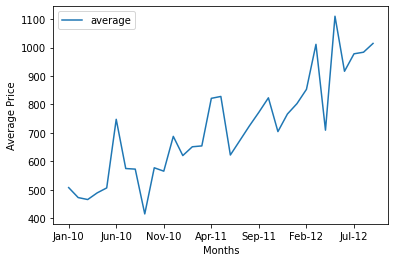

In [123]:
#Create a time series for average series per month
def Task_3():
  import matplotlib
  %matplotlib inline
  data['average'] = data.mean(numeric_only=True, axis=1)
  plot = data.plot(x="Month", y="average")
  plot.set_xlabel(xlabel = "Months")
  plot.set_ylabel(ylabel = "Average Price")
  # print(data)
  # data['Readable_Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True)
Task_3()

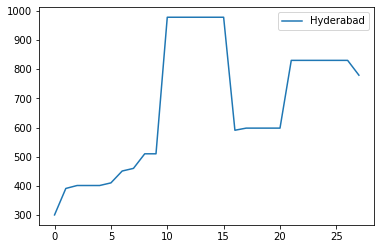

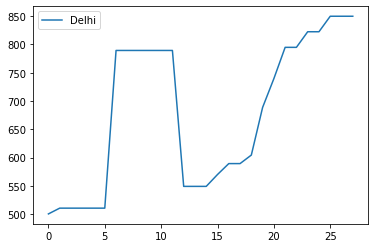

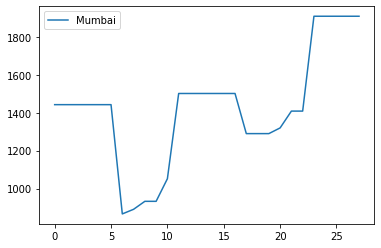

In [162]:
#Time series that defines the maximum in the past 6 months per city
def Task_4():
  import matplotlib.pyplot as plt
  # for i in data.columns[1:-1]:
    # for j in data["Month"][5:]:
  from pandas import DataFrame
  final = pd.DataFrame()
  for j in data.columns[1:-1]:
    t = []
    for i in range(5,len(data)):
      t.append(max(data.loc[i-5:i,j]))
    df = DataFrame(t,columns=[j])
    plot = df.plot()
Task_4()


In [9]:
#Median of price in each city per year
def Task_5():
  ten = []
  eleven = []
  twelve = []
  j = 0
  for i in data["Month"]:
    p = i.split('-')[1]
    if(int(p) == 10):
      ten.append(j)
    elif(int(p) == 11):
      eleven.append(j)
    else:
      twelve.append(j)
    j+=1

  # dropping rows to create alternate dataframes
  df_2010 = data.drop(eleven)
  df_2010 = df_2010.drop(twelve)
  df_2011 = data.drop(ten)
  df_2011 = df_2011.drop(twelve)
  df_2012 = data.drop(eleven)
  df_2012 = df_2012.drop(ten)
  # print(df_2010["Delhi"].mean())
  for i in ['Hyderabad','Delhi', 'Mumbai']:
    print(str(i)+"-2010 " + str(df_2010[i].median()))
    print(str(i)+"-2011 " + str(df_2011[i].median()))
    print(str(i)+"-2012 " + str(df_2012[i].median()))

Task_5()

Hyderabad-2010 335.3
Hyderabad-2011 524.5
Hyderabad-2012 639.0
Delhi-2010 489.0
Delhi-2011 532.5450000000001
Delhi-2012 794.9
Mumbai-2010 823.4449999999999
Mumbai-2011 1041.3400000000001
Mumbai-2012 1398.87
